## Do all preliminary operations

In [1]:
%matplotlib inline

In [2]:
import os
import json
import matplotlib.pyplot as plt

In [3]:
json_wd = os.path.join(os.getcwd(),'json')
print (json_wd)

C:\Users\ephra\Documents\GitHub\PIDA_Project\json


In [4]:
from os import listdir
from os.path import isfile, join

jsonfiles = [f for f in listdir(json_wd) if isfile(join(json_wd, f))]

In [5]:
print(len(jsonfiles))

2


## Import JSON files

In [6]:
#input all json files and load into list
all_files=[]
for filename in jsonfiles:
    print(filename)#allows for easy debugging of JSON files
    file=open(os.path.join(json_wd, filename))
    data=json.load(file)
    all_files.append(data)
    file.close()
    #data=json.loads(filename)
print (all_files[:1])

test - Copy.json
test.json
[{'Police': {'address': ['zipcode', 'street'], 'latitude': ['latitude', 'location']}}]


## Make all the links using tags

In [7]:
all_links=[]
dataset_list=[]
for index, file in enumerate(all_files):
    #print (list(file.keys())[0], "is the name of the dataset")
    name=list(file.keys())[0]
    dataset_list.append(name)
    #print (list(file[name].keys()), "are the column names")
    for col in file[name].keys():
        #print ("Under column ", col, "are tags ", file[name][col])
        for tag in file[name][col]:
            #print ("Tag: ", tag)
            for secondindex in range (index+1, len(all_files)):
                secondname=list(all_files[secondindex].keys())[0]
                for secondcol in all_files[secondindex][secondname].keys():
                    #print ("Under second column ", secondcol, "are tags ", all_files[secondindex][secondname][secondcol])
                    for secondtag in all_files[secondindex][secondname][secondcol]:
                        #print ("Tag: ", secondtag)
                        #do all checking for common tags here
                        if tag.upper()==secondtag.upper():
                            print (name, "and", secondname, "are linked at column", col, "and column", secondcol, "through tag", tag)
                            all_links.append([name.upper(), col.upper(), tag.upper() , secondname.upper(), secondcol.upper(), secondtag.upper()])
print (len(all_links))

Police and 311 are linked at column address and column address through tag zipcode
Police and 311 are linked at column address and column address through tag street
2


## Reformat list for easy access

In [8]:
full_tree=[]#make tag most important
for sublist in all_links:
    tag=sublist[2]
    col1=sublist[1]
    col2=sublist[4]
    dataset1=sublist[0]
    dataset2=sublist[3]
    full_tree.append([tag, col1, dataset1, col2, dataset2])
print (full_tree)

[['ZIPCODE', 'ADDRESS', 'POLICE', 'ADDRESS', '311'], ['STREET', 'ADDRESS', 'POLICE', 'ADDRESS', '311']]


# Basic Data analysis 

## Number of times each tag is linked

In [9]:
tag_dict={}
for sublist in full_tree:
    try:
        tag_dict[sublist[0]]+=1
    except Exception:
        tag_dict[sublist[0]]=1
print (tag_dict)

{'ZIPCODE': 1, 'STREET': 1}


<Container object of 2 artists>

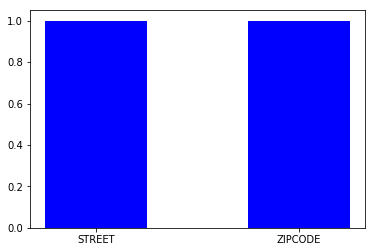

In [10]:
plt.bar(tag_dict.keys(), tag_dict.values(), .5, color='b')

## Number of times each column has associated tags

In [11]:
col_dict={}
for sublist in full_tree:
    try:
        col_dict[sublist[1]]+=1
    except Exception:
        col_dict[sublist[1]]=1
    try:
        col_dict[sublist[3]]+=1
    except Exception:
        col_dict[sublist[3]]=1
print (col_dict)

{'ADDRESS': 4}


<Container object of 1 artists>

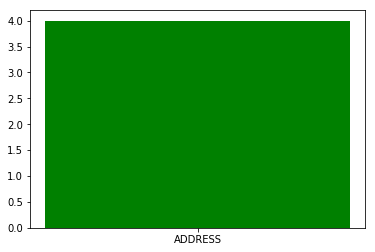

In [12]:
plt.bar(col_dict.keys(), col_dict.values(), .5, color='g')

## Number of links each dataset has

In [13]:
dataset_dict={}
for sublist in full_tree:
    try:
        dataset_dict[sublist[2]]+=1
    except Exception:
        dataset_dict[sublist[2]]=1
    try:
        dataset_dict[sublist[4]]+=1
    except Exception:
        dataset_dict[sublist[4]]=1
print (dataset_dict)

{'POLICE': 2, '311': 2}


<Container object of 2 artists>

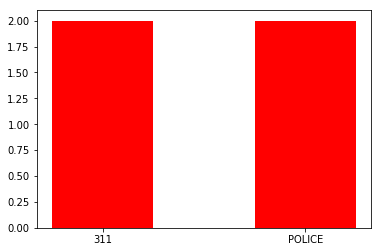

In [14]:
plt.bar(dataset_dict.keys(), dataset_dict.values(), .5, color='r')

## Organize linking by tree

In [15]:
full_tree=sorted(full_tree)

In [16]:
from anytree import Node, RenderTree, Resolver
from anytree.search import find
resolver=Resolver('name')
dummy=Node('All_Tags')
for sublist in full_tree:#Tags
    f=find(dummy, lambda node: node.name == sublist[0])
    if f is None:
        n=Node(sublist[0], parent=dummy)
for sublist in full_tree:#Columns
    f=find(dummy, lambda node: node.name == sublist[1])
    if f is None:
        g=find(dummy, lambda node: node.name == sublist[0])
        n=Node(sublist[1], parent=g)   
    f=find(dummy, lambda node: node.name == sublist[3])
    if f is None:
        g=find(dummy, lambda node: node.name == sublist[0])
        n=Node(sublist[3], parent=g) 
o=None
p=None
for sublist in full_tree:#todo fix this part up
    try:
        g=find(dummy, lambda node: node.name == sublist[1])
        n=Node(sublist[2], parent=g)
    except Exception:
        pass
    try:
        g=find(dummy, lambda node: node.name == sublist[3])
        n=Node(sublist[4], parent=g)
    except Exception:
        pass

In [17]:
dummy.children #all the tags should be listed

(Node('/All_Tags/STREET'), Node('/All_Tags/ZIPCODE'))

In [18]:
all_leafs=[]
def get_leafs(node):
    for child in node.children:
        get_leafs(child)
    if len(node.children) is 0:
        all_leafs.append(node)

In [19]:
get_leafs(dummy)

In [20]:
for index in range (len(all_leafs)):
    if index==0:
        continue
    if all_leafs[index].name == all_leafs[index-1].name and all_leafs[index].parent == all_leafs[index-1].parent:
        all_leafs[index-1].parent=None

In [21]:
for pre, fill, node in RenderTree(dummy):
    print("%s%s" % (pre, node.name))

All_Tags
├── STREET
│   └── ADDRESS
│       ├── POLICE
│       ├── 311
│       ├── POLICE
│       └── 311
└── ZIPCODE
